In [1]:
import numpy as np

from lamp import *
from lamp.models import *
from lamp.utils import * 

In [2]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = load_mnist()
train_batch, test_batch = train_X.shape[0], test_X.shape[0]

onehot = np.zeros((train_y.size, 10))
onehot[np.arange(train_y.size), train_y] = 1

In [4]:
train_X = train_X.reshape(train_batch, -1)
test_X = test_X.reshape(test_batch, -1)

onehot = to_onehot(train_y)

In [15]:
mc = MultiClass()
mc.fit(train_X, onehot, hidden=100, nb_iter=100, gradient_step=1e-2)

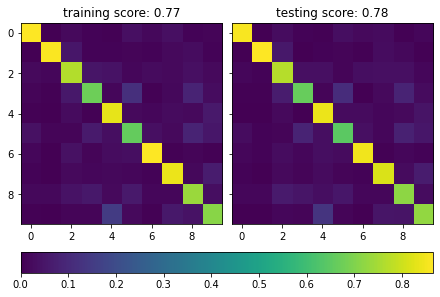

In [16]:
cms, scores = compare_mc_perf(mc, train_X, train_y, test_X, test_y)
plot_perf(cms, scores, "confusion_matrix.png")
plt.savefig("plots/classifier/confusion_matrix_100.png")

In [12]:
mc300 = MultiClass()
mc300.fit(train_X, onehot, hidden=300, nb_iter=100, gradient_step=1e-2)

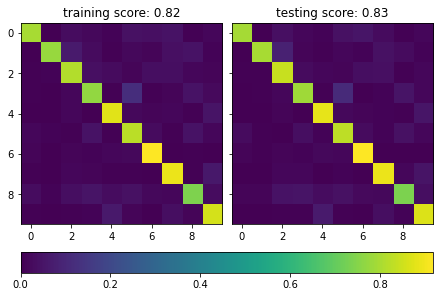

In [14]:
cms300, scores300 = compare_mc_perf(mc300, train_X, train_y, test_X, test_y)
plot_perf(cms300, scores300, "confusion_matrix300.png")
plt.savefig("plots/classifier/confusion_matrix_300.png")

In [5]:
mc_batch = MultiClass()
mc_batch.fit(train_X, onehot, hidden=100, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3515: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


early stopping activated


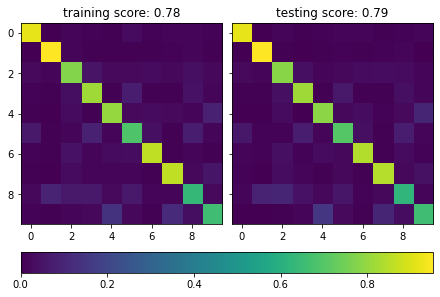

In [11]:
cms_batch, scores_batch = compare_mc_perf(mc_batch, train_X, train_y, test_X, test_y)
plot_perf(cms_batch, scores_batch, "confusion_matrix_batch.png")
plt.savefig("plots/classifier/confusion_matrix_b100.png")

In [7]:
mc_batch300 = MultiClass()
mc_batch300.fit(train_X, onehot, hidden=300, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

early stopping activated


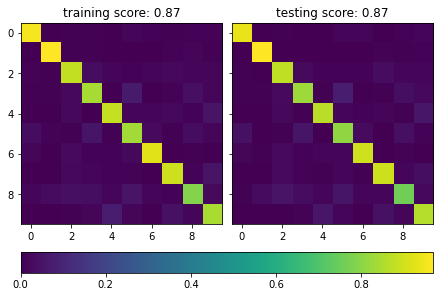

In [10]:
cms_batch300, scores_batch300 = compare_mc_perf(mc_batch300, train_X, train_y, test_X, test_y)
plot_perf(cms_batch300, scores_batch300, "confusion_matrix_batch300.png")
plt.savefig("plots/classifier/confusion_matrix_b300.png")

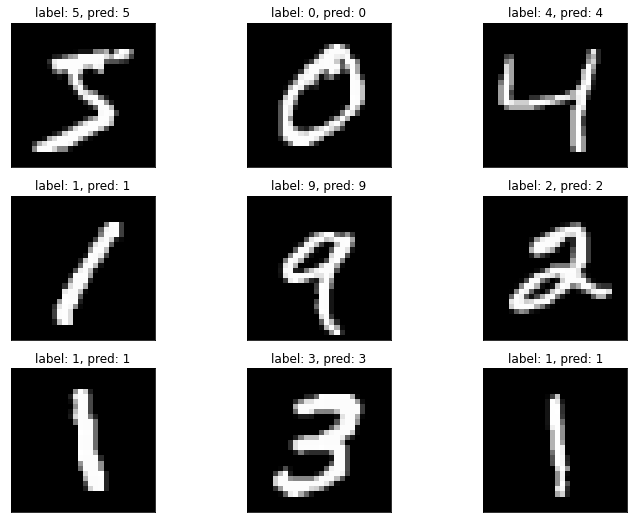

In [9]:
pred_y = mc_batch300.predict(train_X)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(330 + 1 + i)
    show_mnist(train_X[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(f"label: {train_y[i]}, pred: {pred_y[i]}")

plt.savefig("plots/classifier/example_pred")
plt.show()